In [3]:
!pip install torchvision
!pip install matplotlib

     |████████████████████████████████| 19.1 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 944 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01


## Inference
Documentation of inference [here](https://pytorch.org/tutorials/intermediate/flask_rest_api_tutorial.html#inference) and [here](https://stackoverflow.com/questions/61001855/how-to-change-dataloader-in-pytorch-to-read-one-image-for-prediction)


In [4]:
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True

In [5]:
#!apt-get -y install curl

In [6]:
#!curl https://download.pytorch.org/tutorial/hymenoptera_data.zip -o hymenoptera_data.zip 

In [7]:
model_loaded = torch.load('model/model_first.pt')

In [8]:
import io

import torchvision.transforms as transforms
from PIL import Image

def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

file_name = "147542264_79506478c2.jpg"
with open("hymenoptera_data/val/ants/" + file_name, 'rb') as f:
    image_bytes = f.read()
    tensor = transform_image(image_bytes=image_bytes)
    #print(tensor)

def get_prediction(tensor):
    #tensor = transform_image(image_bytes=image_bytes)
    outputs = model_loaded.forward(tensor)
    _, y_hat = outputs.max(1)
    return y_hat


prediction = get_prediction(tensor)

In [9]:
# Convert prediction to value
predictor_translator = {
    0: "ant",
    1: "bee"
}
def predictor_translator_func(prediction):
    pred = prediction.numpy()
    return predictor_translator[pred[0]]


ant


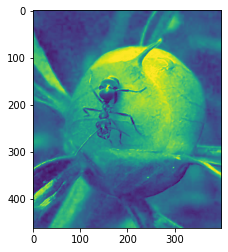

In [10]:
print(predictor_translator_func(prediction))
plt.imshow(tensor[0][0])